In [74]:
"""
Title: Academic Stress Factors Analysis
Author: Kevin Williams
Date: 2025-11-04
Description: Exploratory data analysis on academic stress factors dataset from Kaggle.
"""

'\nTitle: Academic Stress Factors Analysis\nAuthor: Kevin Williams\nDate: 2025-11-04\nDescription: Exploratory data analysis on academic stress factors dataset from Kaggle.\n'

# Table of Contents
1. [Introduction](#1)
2. [Data Cleaning](#2)
3. [EDA](#3)
4. [Correlation](#4)
5. [Visualization](#5)
6. [Conclusions](#6)

# Academic Stress Factors Among Students

## 1. Introduction  

This notebook explores the relationship between study habits, health indicators, and self-reported stress levels among students.

**Objectives:**
1. Identify which factors most strongly correlate with stress.
2. Visualize relationships between academic workload, sleep, and stress.
3. Summarize key insights to inform stress management strategies.

## 2. Data Loading & Cleaning 

In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/academic-stress-factors-among-students/Student Stress Factors (2).csv


In [49]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
stress = pd.read_csv('/kaggle/input/academic-stress-factors-among-students/Student Stress Factors (2).csv')
stress.head()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [51]:
stress.describe()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,3.125000,2.182692,3.326923,2.750000,2.682692,2.875000
std,1.099023,1.247459,1.061158,1.372381,1.470745,1.357825
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,3.000000,2.000000,3.000000,2.500000,3.000000,3.000000
75%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [52]:
stress.isna().sum()

Kindly Rate your Sleep Quality 😴                                    0
How many times a week do you suffer headaches 🤕?                    0
How would you rate you academic performance 👩‍🎓?                    0
how would you rate your study load?                                 0
How many times a week you practice extracurricular activities 🎾?    0
How would you rate your stress levels?                              0
dtype: int64

In [53]:
stress.duplicated().sum()

416

In [54]:
stress.shape

(520, 6)

In [55]:
stress = stress.drop_duplicates()

In [56]:
stress.shape

(104, 6)

In [58]:
stress.columns

Index(['Kindly Rate your Sleep Quality 😴',
       'How many times a week do you suffer headaches 🤕?',
       'How would you rate you academic performance 👩‍🎓?',
       'how would you rate your study load?',
       'How many times a week you practice extracurricular activities 🎾?',
       'How would you rate your stress levels?'],
      dtype='object')

In [59]:
stress.rename(columns={'Kindly Rate your Sleep Quality 😴':"Sleep_Quality",
       'How many times a week do you suffer headaches 🤕?':'Weekly_Headaches',
       'How would you rate you academic performance 👩‍🎓?':'Academic_Performance',
       'how would you rate your study load?':'Study_Load',
       'How many times a week you practice extracurricular activities 🎾?':'Weekly_Extracurricular_Activities',
       'How would you rate your stress levels?':'Stress_Levels'}, inplace=True)

## 3. Exploratory Data Analysis (EDA) 

In [57]:
stress.describe()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
count,104.000000,104.000000,104.000000,104.0000,104.000000,104.000000
mean,3.125000,2.182692,3.326923,2.7500,2.682692,2.875000
std,1.103283,1.252294,1.065271,1.3777,1.476446,1.363088
min,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000
25%,2.000000,1.000000,3.000000,2.0000,1.000000,2.000000
50%,3.000000,2.000000,3.000000,2.5000,3.000000,3.000000
75%,4.000000,3.000000,4.000000,4.0000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000


In [60]:
print(stress.columns)
stress.head()

Index(['Sleep_Quality', 'Weekly_Headaches', 'Academic_Performance',
       'Study_Load', 'Weekly_Extracurricular_Activities', 'Stress_Levels'],
      dtype='object')


,Sleep_Quality,Weekly_Headaches,Academic_Performance,Study_Load,Weekly_Extracurricular_Activities,Stress_Levels
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


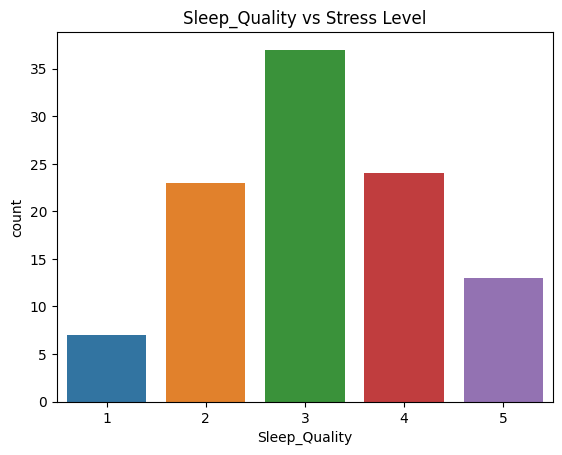

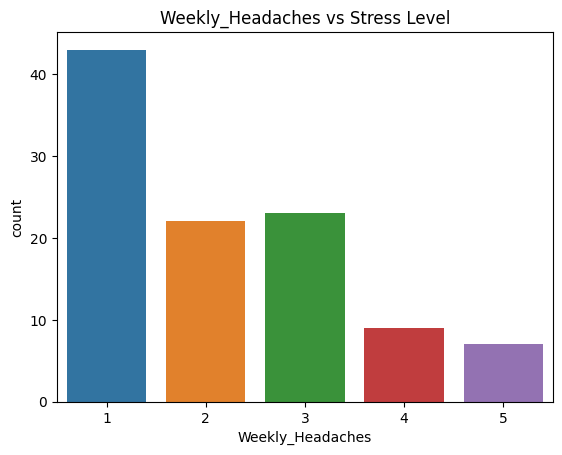

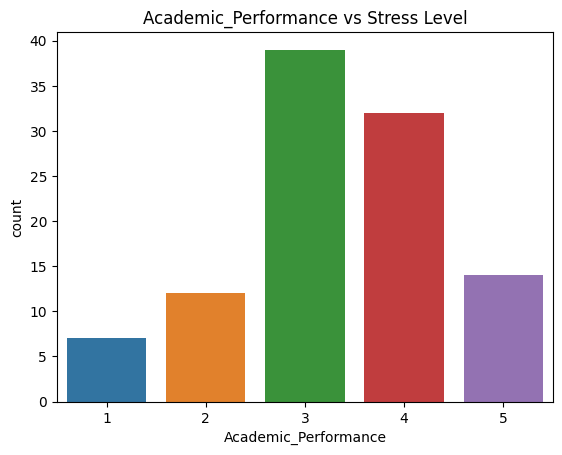

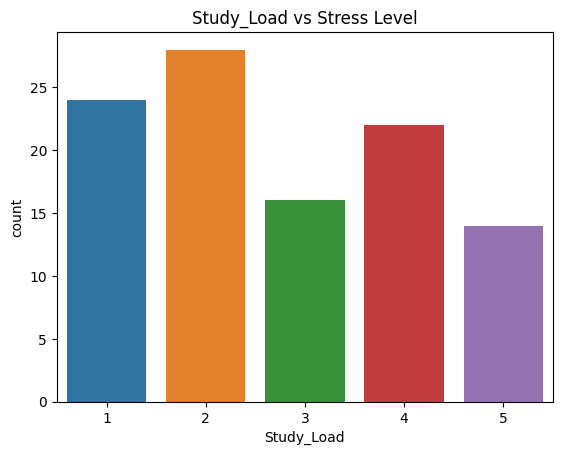

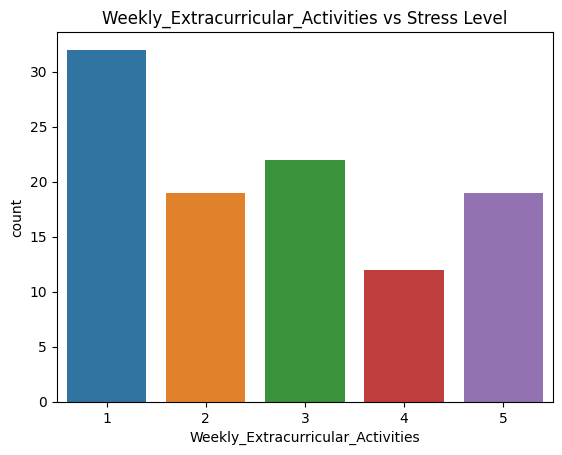

In [75]:
for col in stress.columns:
    if col != 'Stress_Levels':
        sns.countplot(x=col, data=stress)
        plt.title(f'{col} vs Stress Level')
        plt.show()

/tmp/ipykernel_37/1521652265.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Stress_Levels', y='Sleep_Quality', data=stress, ci=None)


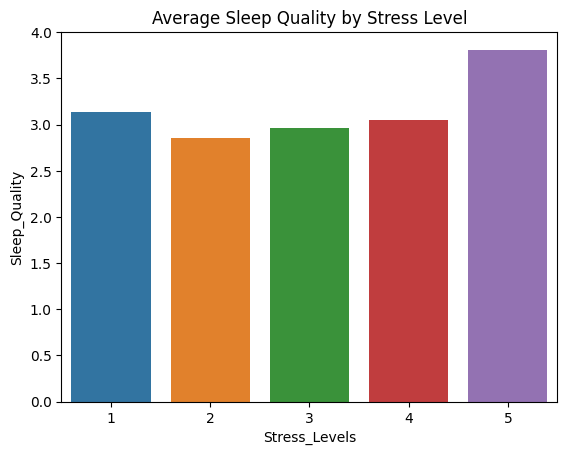

In [77]:
sns.barplot(x='Stress_Levels', y='Sleep_Quality', data=stress, ci=None)
plt.title('Average Sleep Quality by Stress Level')
plt.show()

## 4. Correlation & Statistical Testing  

### Correlation Analysis
To identify which academic or lifestyle factors are most associated with stress, we compute the Pearson correlation matrix.


<Axes: >

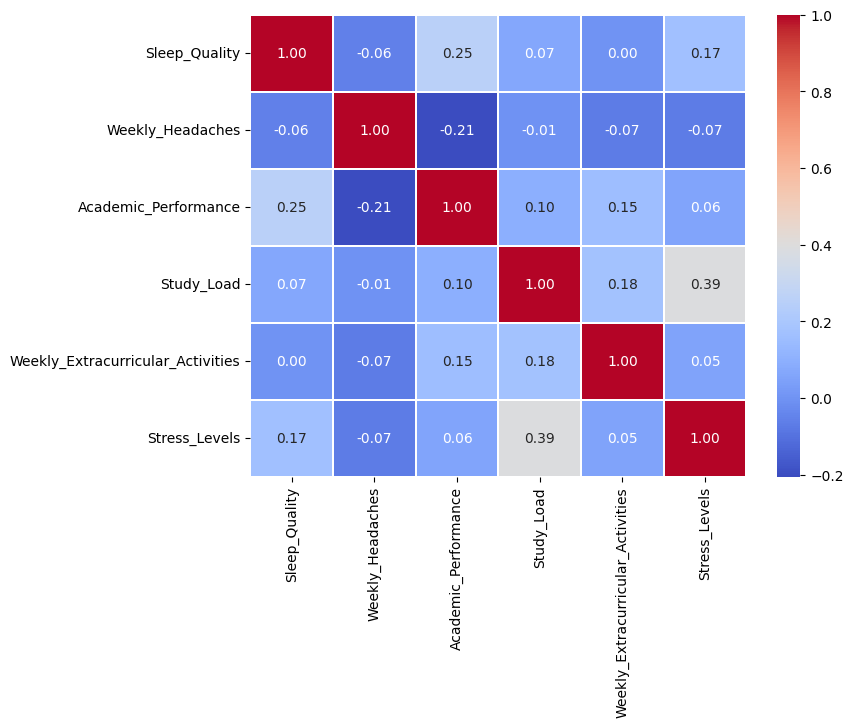

In [61]:
corr = stress.corr()
plt.figure(figsize=(8,6))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".02f", linewidths=0.1)

**Interpretation:**  
Study Load shows the strongest positive correlation with Stress Levels (r = 0.39). Other variables appear weakly related.

Study Load vs Stress Levels

Sleep Quality vs Stress Levels

In [72]:
from scipy.stats import spearmanr

for col in stress.columns:
    if col != 'Stress_Levels':
        rho, p = spearmanr(stress[col], stress['Stress_Levels'])
        print(f"{col:35s} Spearman rho = {rho:.3f}, p = {p:.4f}")

Sleep_Quality                       Spearman rho = 0.141, p = 0.1535
Weekly_Headaches                    Spearman rho = -0.067, p = 0.4962
Academic_Performance                Spearman rho = 0.045, p = 0.6518
Study_Load                          Spearman rho = 0.379, p = 0.0001
Weekly_Extracurricular_Activities   Spearman rho = 0.057, p = 0.5685


In [66]:
stress.corr()['Stress_Levels'].sort_values(ascending=False)

Stress_Levels                        1.000000
Study_Load                           0.391622
Sleep_Quality                        0.165431
Academic_Performance                 0.055161
Weekly_Extracurricular_Activities    0.052463
Weekly_Headaches                    -0.071806
Name: Stress_Levels, dtype: float64

In [67]:
for col in stress.columns:
    if col != 'Stress_Levels':
        r, p = pearsonr(stress[col], stress['Stress_Levels'])
        print(f"{col:35s} r = {r:.3f}, p = {p:.4f}")

Sleep_Quality                       r = 0.165, p = 0.0933
Weekly_Headaches                    r = -0.072, p = 0.4688
Academic_Performance                r = 0.055, p = 0.5781
Study_Load                          r = 0.392, p = 0.0000
Weekly_Extracurricular_Activities   r = 0.052, p = 0.5969


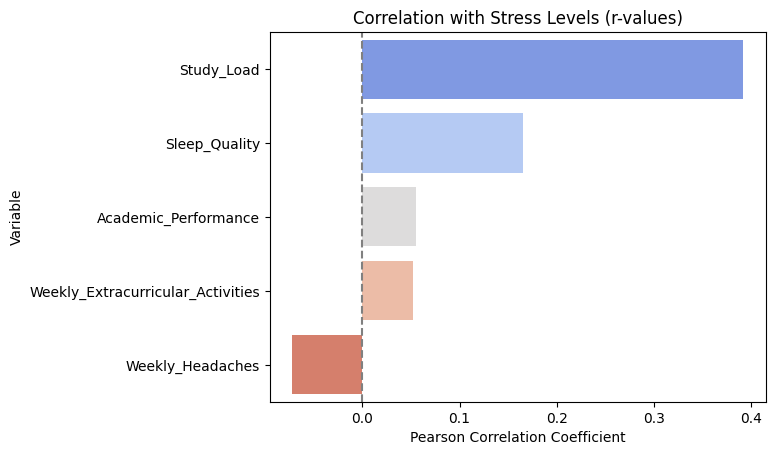

In [68]:
corr_data = {
    'Variable': [
        'Study_Load',
        'Sleep_Quality',
        'Academic_Performance',
        'Weekly_Extracurricular_Activities',
        'Weekly_Headaches'
    ],
    'r': [0.392, 0.165, 0.055, 0.052, -0.072],
    'p': [0.0000, 0.0933, 0.5781, 0.5969, 0.4688]
}

df_corr = pd.DataFrame(corr_data)

sns.barplot(x='r', y='Variable', data=df_corr, palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Correlation with Stress Levels (r-values)')
plt.xlabel('Pearson Correlation Coefficient')
plt.show()

## 5. Visualization & Interpretation 

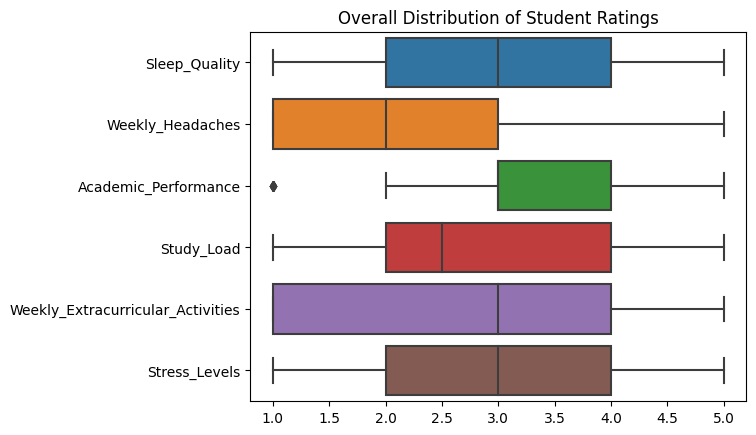

In [69]:
sns.boxplot(data=stress, orient='h')
plt.title("Overall Distribution of Student Ratings")
plt.show()

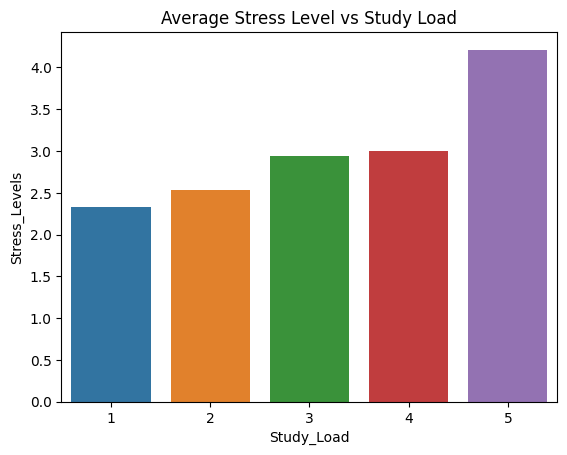

In [78]:
sns.barplot(x='Study_Load', y='Stress_Levels', data=stress, errorbar=None)
plt.title('Average Stress Level vs Study Load')
plt.show()

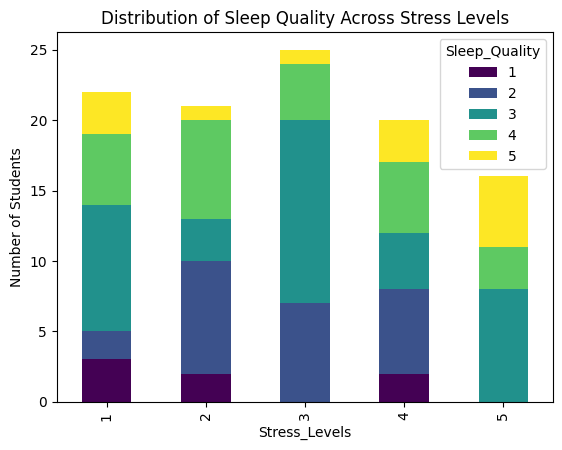

In [71]:
pd.crosstab(stress['Stress_Levels'], stress['Sleep_Quality']).plot(
    kind='bar', stacked=True, colormap='viridis'
)
plt.title('Distribution of Sleep Quality Across Stress Levels')
plt.ylabel('Number of Students')
plt.show()

**Interpretation:**
- Study Load shows the strongest correlation with Stress Levels (r = 0.39, p < 0.001).
- Other variables show weak or negligible correlations, suggesting stress is primarily driven by workload.

## 6. Conclusions  

# 📈 Summary of Findings

- Study Load shows a moderate positive correlation with Stress (r = 0.39).
- Sleep Quality has a weak negative trend with Stress (r = 0.16).
- Other factors (Academic Performance, Extracurricular Activities) show minimal correlation.
- Interpretation: academic workload appears to be the primary driver of stress.
- Recommendation: future studies could include variables like social support, time management, or mental health resources.